## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv('bigmart_train.csv')

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.shape

(8523, 12)

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Exploratory Data Analysis**  --  <font color='red'>to be done by learners only !!</font>

1. Univariate analysis on 
 1. Target variable - Item outlet sales (histogram)
 1. Independent variables (numeric and categorical) - histograms

2. Bivariate analysis
 1.  Explore IV's  with respect to the target variable - scatterplots
 
3. Correlation matrix

In [7]:
### EXPLORING DATA  -- Note : it is UNCLEAN
train['Item_Fat_Content'].unique()
#notice Low fat, Low Fat, LF are all the same variable

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
train['Outlet_Age'] = 2021 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [10]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,23.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,12.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,17.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,22.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
train['Outlet_Size'].mode()[0]

'Medium'

In [16]:
# fill the na for outlet size with medium
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [17]:
# fill the na for item weight with the mean of weights
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

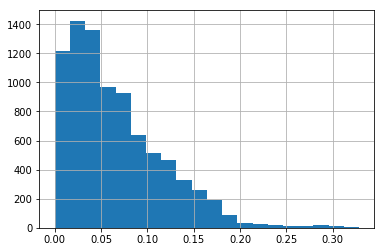

In [19]:
train['Item_Visibility'].hist(bins=20)

In [20]:
# delete the observations

Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [22]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [23]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [24]:
train = filt_train
train.shape

(8379, 13)

In [21]:
#train['Item_Visibility'].value_counts()

In [25]:
#creating a category
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [26]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [29]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [30]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,NaN


In [41]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].fillna('Low Viz')

In [42]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,Low Viz


**Encoding Categorical Variables**


In [43]:
le = LabelEncoder()

In [44]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [46]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_Fat_Content'].unique()

array([0, 1])

In [47]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])
train['Item_Visibility_bins'].unique()

array([1, 2, 0])

In [48]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Size'].unique()

array([1, 0, 2])

In [49]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [50]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [51]:
# create dummies for outlet type
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [52]:
train = pd.concat([train, dummy], axis=1)
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.3,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.138,22,1,0,1,0,0


In [53]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [54]:
# got to drop all the object types features
train = train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [55]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [56]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,22,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,12,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,22,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,23,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,34,1,0,1,0,0


**Linear Regression**

In [57]:
# build the linear regression model
X = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

In [59]:
test = pd.read_csv('bigmart_test.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [61]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [62]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [63]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [64]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [65]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [66]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [67]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [68]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [69]:
test['Outlet_Age'] = 2021 - test['Outlet_Establishment_Year']

In [70]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test, dummy], axis=1)

In [71]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [72]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'Outlet_Age', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'],
       dtype='object'))

In [73]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
lin = LinearRegression()

In [75]:
lin.fit(xtrain, ytrain)
print(lin.coef_)
lin.intercept_

[    3.32565903    27.49948402  -196.15278716    15.96531149
    16.76148752     8.04121542    -2.28120926    17.62300318
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]


-186.6932621462056

In [76]:
predictions = lin.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

1118.41605258575


In [88]:
## To know whether a RMSE is good or not , find Scatter Index ( SI )
## SI = (RMSE/average observed value)*100%. 
## it will be more easy to know if it is a good model or not. 
## If SI < 10% is a good model, SI < 5% is a very good model.

1180 / y.mean() * 100  
## This seems to a very poor model

53.32389278874149

#### A good RMSE for this problem would be around 221 

Try using Ridge, Lasso, ElasticNet, and compare the RMSE scores.
You can try Gradient boosting too.

 **Lesson 08: Ensemble learning** is about xgboost
 
Once you have learnt the XGboost techniques, come back and re-work on this problem.
*XGBOOST* will give the lowest RMSE.
 


In [81]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain, ridgeReg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, ridgeReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(xtest, ytest)))

1139.5277714448032
1118.3593685856831
R2 Value/Coefficient of Determination: 0.548659756640925


In [82]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(xtrain, ytrain)

print(sqrt(mean_squared_error(ytrain, lassoreg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, lassoreg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(xtest, ytest)))

1139.5271102348174
1118.4095347838993
R2 Value/Coefficient of Determination: 0.5486192642328969


In [83]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001, normalize=True)
Elas.fit(xtrain, ytrain)

print(sqrt(mean_squared_error(ytrain, Elas.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, Elas.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(Elas.score(xtest, ytest)))

1477.92019351575
1429.1476301155997
R2 Value/Coefficient of Determination: 0.2629524867556169
